# Pymaceuticals Inc.
---

### Analysis

- There is a positive correlation between the weight of the mice and the tumor size. The P-value of 0.84 indicates this linear correlation. Therefore, we might want to keep the mice doing exercise to help them decrease tumor size.
Capomulin seems to be an effective drug regimen to treat the cancer. The tumor size in mouse b128 decreased as time went on.
Of the 4 drug regimens we analyzed, Capomulin and Ramicane were the most effective at decreasing tumor size. The least effective were the other two drugs Infubinol and Ceftamin.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharma_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pharma_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(pd.unique(pharma_data_complete['Mouse ID']))
mouse_count

249

In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups=pharma_data_complete.groupby(['Mouse ID','Timepoint'])['Mouse ID'].size().reset_index(name='counts')
dups=dups.query('counts >1')
dups=pd.unique(dups['Mouse ID'])
dups



array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dups=pharma_data_complete[pharma_data_complete['Mouse ID'].isin(dups)]
all_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pharma_data_complete=pharma_data_complete[~pharma_data_complete['Mouse ID'].isin(dups)]
clean_pharma_data_complete




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [77]:
# Checking the number of mice in the clean DataFrame.
clean_pharma_data_complete['Mouse ID'].value_counts()


k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_pharma_data_complete.groupby(['Drug Regimen'])
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stats_mean = summary_stats['Tumor Volume (mm3)'].mean()
summary_stats_med = summary_stats['Tumor Volume (mm3)'].median()
summary_stats_var = summary_stats['Tumor Volume (mm3)'].var()
summary_stats_std = summary_stats['Tumor Volume (mm3)'].std()
summary_stats_sem = summary_stats['Tumor Volume (mm3)'].sem()

summary_stats_final_df = pd.DataFrame({"Mean Tumor Volume": summary_stats_mean,"Median Tumor Volume" : summary_stats_med,"Tumor Volume Variance" : summary_stats_var,"Tumor Volume Std. Dev." : summary_stats_std,"Tumor Volume Std. Err." : summary_stats_sem})
summary_stats_final_df
	

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [80]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
alt_summary_stats = clean_pharma_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
alt_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

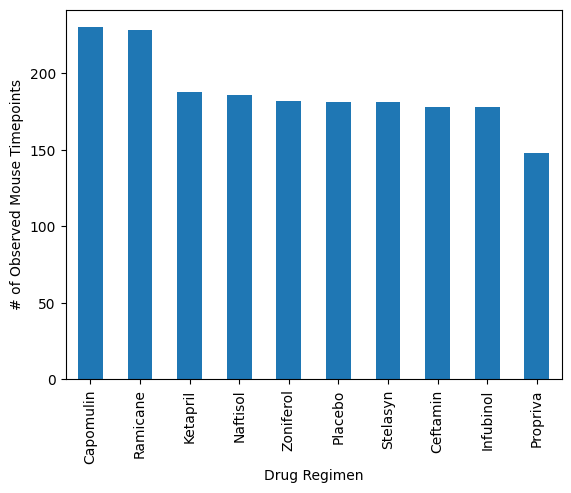

In [92]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot_data = clean_pharma_data_complete.groupby(['Drug Regimen'])['Timepoint'].count()
bar_plot=bar_plot_data.sort_values(ascending=False).plot.bar()  
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

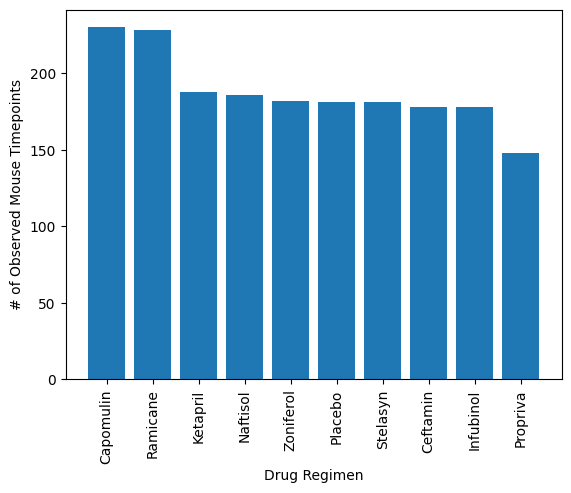

In [106]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_plot_data2 = clean_pharma_data_complete.groupby(['Drug Regimen'])['Timepoint'].count().reset_index(name='counts')
bar_plot_data2=bar_plot_data2.sort_values(by=['counts'], ascending=False)
plt.bar(bar_plot_data2['Drug Regimen'], bar_plot_data2['counts'])
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical') 
plt.show()


<AxesSubplot:ylabel='Sex'>

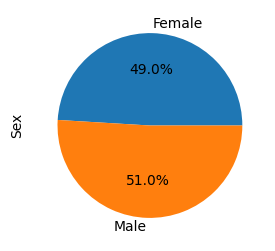

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_sex = clean_pharma_data_complete.groupby(['Sex'])['Sex'].count()
pie_sex.plot.pie(autopct='%1.1f%%', figsize=(3, 3))

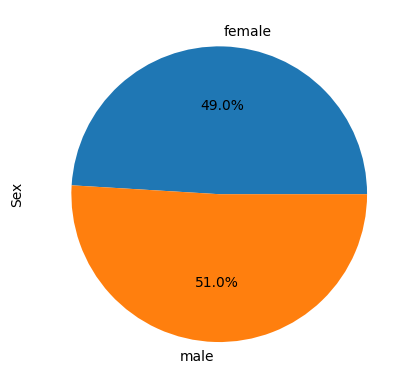

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_sex, labels=('female', 'male'), autopct='%1.1f%%')
plt.ylabel('Sex') 
plt.show()

## Quartiles, Outliers and Boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_pharma_data_complete.groupby(['Mouse ID'])['Timepoint'].max()
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
more_clean_pharma_data_complete = pd.merge(clean_pharma_data_complete, greatest_timepoint_df, on=('Mouse ID', 'Timepoint'), how='right')
more_clean_pharma_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [138]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = pd.unique(more_clean_pharma_data_complete['Drug Regimen'])
treatments

# Create empty list to fill with tumor vol data (for plotting)
list_Infubinol = []
list_Placebo = []
list_Ceftamin = []
list_Stelasyn = []
list_Zoniferol = []
list_Ramicane = []
list_Ketapril = []
list_Propriva = []
list_Naftisol = []
list_Capomulin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in more_clean_pharma_data_complete.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        list_Infubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        list_Placebo.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        list_Ceftamin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        list_Stelasyn.append(row['Tumor Volume (mm3)']) #24 rows only
    if row["Drug Regimen"] == treatments[4]:
        list_Zoniferol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[5]:
        list_Ramicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[6]:
        list_Ketapril.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[7]:
        list_Propriva.append(row['Tumor Volume (mm3)']) #24 rows only
    if row["Drug Regimen"] == treatments[8]:
        list_Naftisol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[9]:
        list_Capomulin.append(row['Tumor Volume (mm3)'])
    
    # add subset 
iqr_df = pd.DataFrame({treatments[0]: list_Infubinol,treatments[2]: list_Ceftamin,treatments[5]: list_Ramicane,treatments[9]: list_Capomulin})
    
    # Determine outliers using upper and lower bounds
iqr_df_max = iqr_df.max()
iqr_df_min = iqr_df.min()

iqr_df


,Infubinol,Ceftamin,Ramicane,Capomulin
0,67.973419,62.999356,38.407618,38.982878
1,65.525743,45.000000,43.047543,38.939633
2,57.031862,56.057749,38.810366,30.485985
3,66.083066,55.742829,32.978522,37.074024
4,72.226731,48.722078,38.342008,40.159220
5,36.321346,47.784682,33.397653,47.685963
6,60.969711,61.849023,37.311236,37.311846
7,62.435404,68.923185,40.659006,38.125164
8,60.918767,67.748662,29.128472,38.753265
9,67.289621,57.918381,33.562402,41.483008


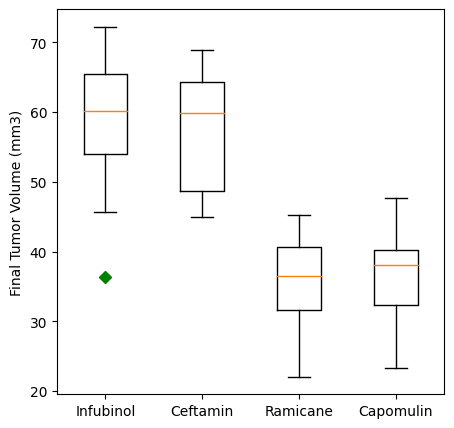

In [152]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [iqr_df[treatments[0]],
                iqr_df[treatments[2]],
                iqr_df[treatments[5]],
                iqr_df[treatments[9]]
               ]
fig, x = plt.subplots(figsize=(5,5))
x.set_ylabel('Final Tumor Volume (mm3)') 
x.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], ['Infubinol','Ceftamin','Ramicane','Capomulin']) 
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

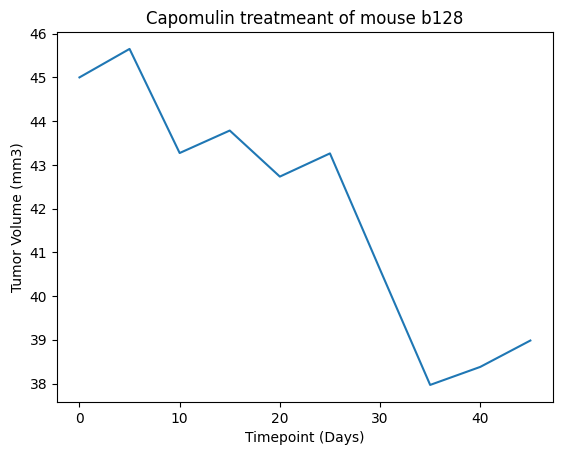

In [168]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_pharma_data_complete.loc[clean_pharma_data_complete["Mouse ID"] == "b128"]
x_SP = line_df["Timepoint"] 
tumor_vol = line_df["Tumor Volume (mm3)"] 
plt.title('Capomulin treatmeant of mouse b128') 
plt.plot(x_SP, tumor_vol) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('Line CHart')
plt.show()

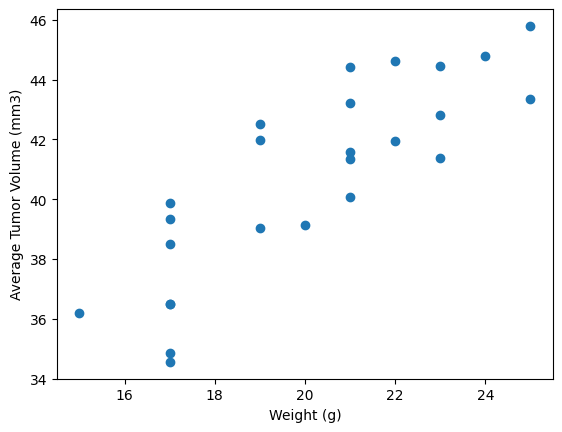

In [171]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cacapomulin_reg_df = clean_pharma_data_complete.loc[clean_pharma_data_complete["Drug Regimen"] == "Capomulin"]
capomulin_average = cacapomulin_reg_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatter plot')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


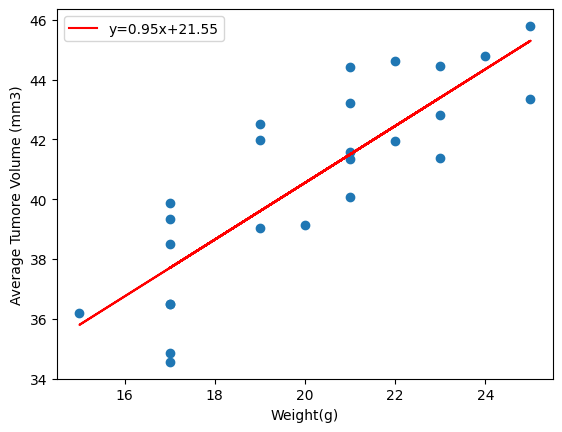

In [172]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")
model=st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
model
slope = 0.95
intercept = 21.55
line = slope*(capomulin_average['Weight (g)'])+intercept
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.legend()
plt.savefig('linearregression')
plt.show()